# HW 1

In [1]:
import pandas as pd
from EM_method import *
from parameter_generator import *

In [2]:
data_labeled = pd.read_csv("Iris.csv")

In [3]:
data_labeled

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [4]:
attribute = data_labeled[['SepalWidthCm','PetalWidthCm']]

In [5]:
import scipy.stats as ss
attribute_ = ss.zscore(attribute,axis=0)

# 2 dimension

In [17]:

while True:
    try:
        theta = get_random_theta(2)
        likelihood_list=[]
        i = 0
        while True:
            l,_ = E_step(attribute_, theta)
            likelihood_list.append(np.mean(l))
            if i>0 and abs(likelihood_list[-1] - likelihood_list[-2]) < 0.00000000001:
                break
            theta = M_step(attribute_, theta)
            i=i+1
        _,Prob = E_step(attribute_, theta)
        petal_n = np.argmax(Prob, axis=1)
        print("===================================================")
        print("final theta is")
        print(theta)
        print("estimated clustering is")
        print(petal_n)
        print("The number of steps are")
        print(i)
        break
    except:
        continue

final theta is
{'phi_1': 0.3333305380332383, 'phi_2': 0.2637224919733755, 'mu_0': array([-0.32538515,  0.9542789 ]), 'mu_1': array([ 0.84232848, -1.25512924]), 'mu_2': array([-0.56749367,  0.12835125]), 'st_0': array([[0.64779194, 0.2285864 ],
       [0.2285864 , 0.20298633]]), 'st_1': array([[0.7618003 , 0.03410024],
       [0.03410024, 0.0194701 ]]), 'st_2': array([[0.45860832, 0.13922197],
       [0.13922197, 0.05808268]])}
estimated clustering is
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 0 0 2 2 2 2 2 2 2 2 2 2 2 2 2 0 2 0 2 0 2
 2 2 2 0 2 2 2 2 2 0 2 2 2 0 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0]
The number of steps are
228


In [18]:
petal_n

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 0,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

# Visualize

In [19]:
import matplotlib.pyplot as plt

## estimation

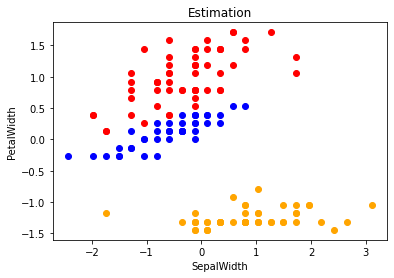

In [23]:
color = ['r','orange','b']
for i,t in enumerate(petal_n):
    plt.scatter(attribute_[i,0],attribute_[i,1],color=color[t])
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.title('Estimation')
plt.savefig('Myestimation.jpg')

## real

Text(0.5, 1.0, 'REAL')

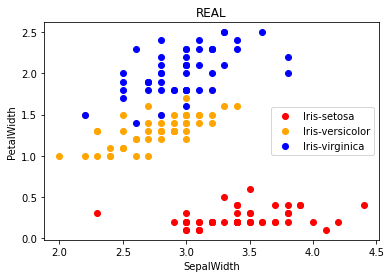

In [16]:
color = ['r','orange','b']
label = ['Iris-setosa','Iris-versicolor','Iris-virginica']

for i in range(3):
    data = data_labeled[data_labeled['Species']==label[i]]
    plt.scatter(data['SepalWidthCm'],data['PetalWidthCm'],color=color[i],label=label[i])
    
plt.xlabel('SepalWidth')
plt.ylabel('PetalWidth')
plt.legend()
plt.title('REAL')